In [170]:
from mynn.activations.relu import relu
from mygrad.nnet.layers import max_pool
from mygrad.nnet.losses import softmax_crossentropy
from mynn.losses.l1_loss import l1_loss
from mynn.initializers.glorot_uniform import glorot_uniform
from mynn.layers.dense import dense
from mynn.layers.conv import conv
from noggin import create_plot
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import misc
import mygrad as mg
%matplotlib notebook

In [112]:
class Model():
    def __init__ (self):
        init_kwargs = {'gain': np.sqrt(2)} #Might Change
        self.conv1 = conv(3, 35 , 40, 2,stride=(2,2), 
                          weight_initializer=glorot_uniform, 
                          weight_kwargs=init_kwargs)
        self.conv2 = conv(35, 15, 1, 4, stride = ( 2 , 2),
                          weight_initializer=glorot_uniform, 
                          weight_kwargs=init_kwargs)
        self.dense1 = dense(180, 90, 
                            weight_initializer=glorot_uniform, 
                            weight_kwargs=init_kwargs)
        self.dense2 = dense(90, 45, 
                            weight_initializer=glorot_uniform, 
                            weight_kwargs=init_kwargs)
        self.dense3 = dense(45, 15, 
                            weight_initializer=glorot_uniform, 
                            weight_kwargs=init_kwargs)
    def __call__(self, image):
        """Input
        ___________
        image (Channel, Length, Width)
        
        Output
        ___________
        size 15 list
        
        """
        #return self.dense2(relu(self.dense1(relu)))
        print(f"The image before any layers is {image.shape}")
        x = relu(self.conv1(image))
        print(f"The input after the first conv is {x.shape}")
        x = max_pool(x, (2, 2), 2)
        print(f"The input after the first pool is {x.shape}")
        x = relu(self.conv2(x))
        print(f"The input after the second conv is {x.shape}")
        x = max_pool(x, (2, 2), 2)
        print(f"The input after the second pool is {x.shape}")

        #x=mg.Tensor(np.ravel(x.data))
        x = x.reshape(x.shape[0], -1) 
        print(f"The input after flattening is {x.shape}")
        
        
        x = relu (self.dense1(x))
        print(f"The input after the first dense layer is {x.shape}")
        x = relu (self.dense2(x))
        print(f"The input after the second dense is {x.shape}")
        x = relu (self.dense3(x))
        print(f"The input after the third dense is {x.shape}")
        x=np.rint(x.data)
        #ret = []
        #for i in np.arange(x.shape[0]):
        #    ret.append(self.decoder(x[i]))
        return x
    def decoder(self,x):
        """Input the numpy array from the call function
        Input
        __________________
        np.ndarray shape (15,) with only integers 
        
        Output
        __________________
        List of size 15 or less"""
        assert isinstance(x, np.ndarray), f"This is not a valid input it is not the right type but the type given was {type(x)}"
        
        
        assert x.shape[-1] == 15, f"The call function should be giving you length 15 but you are not getting that, you are getting {x.shape}"
        
        alphabet ="abcdefghijklmnop"
        ret=[]
        
        for i in x:
            if i>=0 and i<10:
                ret.append(i);
            if i>10 and i<36:
                i-=10 
                ret.append(alphabet[i])
            if i> 36 or i<0:
                print("There is a problem")
        return ret
    @property
    def parameters(self):
        '''Returns the weights of the model'''
        return list(self.conv1.parameters)+list(self.conv2.parameters)+list(self.dense1.parameters)+list(self.dense2.parameters)
        

In [113]:
from mynn.optimizers.sgd import SGD

model = Model()
optim = SGD(model.parameters, learning_rate=0.01, momentum=0.9, weight_decay=5e-04)


In [203]:
def accuracy(prediction, truth):
    """
    Input
    Prediction a np.ndarray
    Truth a np.ndarray
    _________________________
    
    Output
    ret an integer
    _________________________
    
    """
    if isinstance(prediction,mg.Tensor):
        prediction= prediction.data
    if isinstance(truth,mg.Tensor):
        truth= truth.data
    ret=0
    
    for i in np.arange(prediction):
        for j in np.arange(prediction[i]):
            ret +=j
    
    return ret

<IPython.core.display.Javascript object>


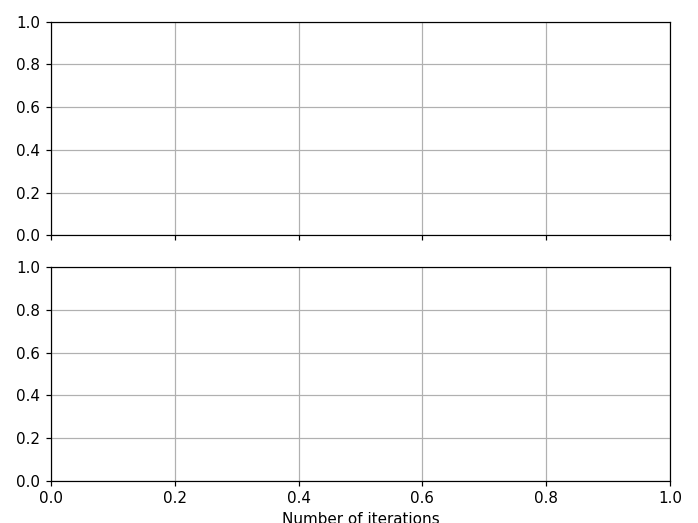

In [115]:
plotter, fig, ax = create_plot(["loss", "accuracy"])

In [75]:
x_total=np.zeros((1070,50,200,4))
y_total=[]
index=0
for entry in os.listdir("DataSets\samples\samples"):
    if os.path.isfile(os.path.join("DataSets\samples\samples", entry)):
        print((misc.imread(os.path.join("DataSets\samples\samples", entry))).shape)
        try:
            x_total[index]=(misc.imread(os.path.join("DataSets\samples\samples", entry)))
            #x_total.append(np.ndarray(f.read()))
            y_total.append(entry[:-4])
            index+=1
        except:
            print(f"{entry} did not work")
x_total=x_total[:len(y_total)]  
x_total=x_total.transpose((0,3,1, 2))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'DataSets\\samples\\samples'

In [116]:
x_total=np.zeros((1070,50,200,3))
y_total=[]
index=0
for entry in os.listdir("DataSets\samples"):
    if os.path.isfile(os.path.join("DataSets\samples", entry)):
        V= "DataSets\samples"
        print(f"The file length for {entry} is {(misc.imread(os.path.join(V, entry))).shape}")
        try:
            print(misc.imread(os.path.join("DataSets\samples", entry), mode = 'RGB').shape)
            if misc.imread(os.path.join("DataSets\samples", entry),mode = 'RGB').shape[-1] ==3:   
                print(f"{entry} is valid")
                x_total[index]=(misc.imread(os.path.join("DataSets\samples", entry),mode = 'RGB'))
                y_total.append(entry[:-4])
                index+=1
            else:
                print(f"{entry} is invalid")
        except:
            print(f"{entry} did not work")
            
            
print(f"The total of y is {len(y_total)}")
x_total=x_total[:len(y_total)]  
x_total=x_total.transpose((0,3,1, 2))
print(f"The total of x is {x_total.shape}")

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':


The file length for 226md.png is (50, 200, 4)
(50, 200, 3)
226md.png is valid
The file length for 22d5n.png is (50, 200, 4)
(50, 200, 3)
22d5n.png is valid
The file length for 2356g.png is (50, 200, 4)
(50, 200, 3)
2356g.png is valid
The file length for 23mdg.png is (50, 200, 4)
(50, 200, 3)
23mdg.png is valid
The file length for 23n88.png is (50, 200, 4)
(50, 200, 3)
23n88.png is valid
The file length for 243mm.png is (50, 200, 4)
(50, 200, 3)
243mm.png is valid
The file length for 244e2.png is (50, 200, 4)
(50, 200, 3)
244e2.png is valid
The file length for 245y5.png is (50, 200, 4)
(50, 200, 3)
245y5.png is valid
The file length for 24f6w.png is (50, 200, 4)
(50, 200, 3)
24f6w.png is valid
The file length for 24pew.png is (50, 200, 4)
(50, 200, 3)
24pew.png is valid
The file length for 25257.png is (50, 200, 4)
(50, 200, 3)
25257.png is valid
The file length for 253dc.png is (50, 200, 4)
(50, 200, 3)
253dc.png is valid
The file length for 25egp.png is (50, 200, 4)
(50, 200, 3)
25egp

(50, 200, 3)
474ff.png is valid
The file length for 478nx.png is (50, 200, 4)
(50, 200, 3)
478nx.png is valid
The file length for 47e4p.png is (50, 200, 4)
(50, 200, 3)
47e4p.png is valid
The file length for 47m2b.png is (50, 200, 4)
(50, 200, 3)
47m2b.png is valid
The file length for 488de.png is (50, 200, 4)
(50, 200, 3)
488de.png is valid
The file length for 4b2pw.png is (50, 200, 4)
(50, 200, 3)
4b2pw.png is valid
The file length for 4c8n8.png is (50, 200, 4)
(50, 200, 3)
4c8n8.png is valid
The file length for 4cfw8.png is (50, 200, 4)
(50, 200, 3)
4cfw8.png is valid
The file length for 4cn7b.png is (50, 200, 4)
(50, 200, 3)
4cn7b.png is valid
The file length for 4d22m.png is (50, 200, 4)
(50, 200, 3)
4d22m.png is valid
The file length for 4dgf7.png is (50, 200, 4)
(50, 200, 3)
4dgf7.png is valid
The file length for 4dw3w.png is (50, 200, 4)
(50, 200, 3)
4dw3w.png is valid
The file length for 4egem.png is (50, 200, 4)
(50, 200, 3)
4egem.png is valid
The file length for 4exnn.png is

(50, 200, 3)
6end3.png is valid
The file length for 6f2yc.png is (50, 200, 4)
(50, 200, 3)
6f2yc.png is valid
The file length for 6f857.png is (50, 200, 4)
(50, 200, 3)
6f857.png is valid
The file length for 6fg8c.png is (50, 200, 4)
(50, 200, 3)
6fg8c.png is valid
The file length for 6fgdw.png is (50, 200, 4)
(50, 200, 3)
6fgdw.png is valid
The file length for 6fn84.png is (50, 200, 4)
(50, 200, 3)
6fn84.png is valid
The file length for 6g45w.png is (50, 200, 4)
(50, 200, 3)
6g45w.png is valid
The file length for 6ge3p.png is (50, 200, 4)
(50, 200, 3)
6ge3p.png is valid
The file length for 6gnm3.png is (50, 200, 4)
(50, 200, 3)
6gnm3.png is valid
The file length for 6m5eg.png is (50, 200, 4)
(50, 200, 3)
6m5eg.png is valid
The file length for 6mege.png is (50, 200, 4)
(50, 200, 3)
6mege.png is valid
The file length for 6mn8n.png is (50, 200, 4)
(50, 200, 3)
6mn8n.png is valid
The file length for 6mygb.png is (50, 200, 4)
(50, 200, 3)
6mygb.png is valid
The file length for 6n443.png is

(50, 200, 3)
8ne4g.png is valid
The file length for 8nn73.png is (50, 200, 4)
(50, 200, 3)
8nn73.png is valid
The file length for 8np22.png is (50, 200, 4)
(50, 200, 3)
8np22.png is valid
The file length for 8npd5.png is (50, 200, 4)
(50, 200, 3)
8npd5.png is valid
The file length for 8npe3.png is (50, 200, 4)
(50, 200, 3)
8npe3.png is valid
The file length for 8pfxx.png is (50, 200, 4)
(50, 200, 3)
8pfxx.png is valid
The file length for 8w754.png is (50, 200, 4)
(50, 200, 3)
8w754.png is valid
The file length for 8w875.png is (50, 200, 4)
(50, 200, 3)
8w875.png is valid
The file length for 8wy7d.png is (50, 200, 4)
(50, 200, 3)
8wy7d.png is valid
The file length for 8xef7.png is (50, 200, 4)
(50, 200, 3)
8xef7.png is valid
The file length for 8y63f.png is (50, 200, 4)
(50, 200, 3)
8y63f.png is valid
The file length for 8y6b3.png is (50, 200, 4)
(50, 200, 3)
8y6b3.png is valid
The file length for 8ypdn.png is (50, 200, 4)
(50, 200, 3)
8ypdn.png is valid
The file length for b26nd.png is

(50, 200, 3)
cg5dd.png is valid
The file length for cgcgb.png is (50, 200, 4)
(50, 200, 3)
cgcgb.png is valid
The file length for cm6yb.png is (50, 200, 4)
(50, 200, 3)
cm6yb.png is valid
The file length for cndmc.jpg is (50, 200, 3)
(50, 200, 3)
cndmc.jpg is valid
The file length for cnex4.png is (50, 200, 4)
(50, 200, 3)
cnex4.png is valid
The file length for cnmnn.png is (50, 200, 4)
(50, 200, 3)
cnmnn.png is valid
The file length for cnwyc.png is (50, 200, 4)
(50, 200, 3)
cnwyc.png is valid
The file length for cpc8c.png is (50, 200, 4)
(50, 200, 3)
cpc8c.png is valid
The file length for cpe63.png is (50, 200, 4)
(50, 200, 3)
cpe63.png is valid
The file length for cwdnx.png is (50, 200, 4)
(50, 200, 3)
cwdnx.png is valid
The file length for cwgyx.png is (50, 200, 4)
(50, 200, 3)
cwgyx.png is valid
The file length for cwmny.png is (50, 200, 4)
(50, 200, 3)
cwmny.png is valid
The file length for cx3wg.png is (50, 200, 4)
(50, 200, 3)
cx3wg.png is valid
The file length for cy3nw.png is

(50, 200, 3)
ewnx8.png is valid
The file length for ewyg7.jpg is (50, 200, 3)
(50, 200, 3)
ewyg7.jpg is valid
The file length for excmn.png is (50, 200, 4)
(50, 200, 3)
excmn.png is valid
The file length for exycn.png is (50, 200, 4)
(50, 200, 3)
exycn.png is valid
The file length for f228n.png is (50, 200, 4)
(50, 200, 3)
f228n.png is valid
The file length for f22bn.png is (50, 200, 4)
(50, 200, 3)
f22bn.png is valid
The file length for f2fge.png is (50, 200, 4)
(50, 200, 3)
f2fge.png is valid
The file length for f2m8n.png is (50, 200, 4)
(50, 200, 3)
f2m8n.png is valid
The file length for f35xp.png is (50, 200, 4)
(50, 200, 3)
f35xp.png is valid
The file length for f364x.png is (50, 200, 4)
(50, 200, 3)
f364x.png is valid
The file length for f4fn2.png is (50, 200, 4)
(50, 200, 3)
f4fn2.png is valid
The file length for f4wfn.png is (50, 200, 4)
(50, 200, 3)
f4wfn.png is valid
The file length for f5cm2.png is (50, 200, 4)
(50, 200, 3)
f5cm2.png is valid
The file length for f5e5e.png is

(50, 200, 3)
m67b3.png is valid
The file length for m6n4x.png is (50, 200, 4)
(50, 200, 3)
m6n4x.png is valid
The file length for m74dm.png is (50, 200, 4)
(50, 200, 3)
m74dm.png is valid
The file length for m75bf.png is (50, 200, 4)
(50, 200, 3)
m75bf.png is valid
The file length for m8gmx.png is (50, 200, 4)
(50, 200, 3)
m8gmx.png is valid
The file length for m8m4x.png is (50, 200, 4)
(50, 200, 3)
m8m4x.png is valid
The file length for mb4en.png is (50, 200, 4)
(50, 200, 3)
mb4en.png is valid
The file length for mbf58.png is (50, 200, 4)
(50, 200, 3)
mbf58.png is valid
The file length for mbp2y.png is (50, 200, 4)
(50, 200, 3)
mbp2y.png is valid
The file length for mc35n.png is (50, 200, 4)
(50, 200, 3)
mc35n.png is valid
The file length for mc8w2.png is (50, 200, 4)
(50, 200, 3)
mc8w2.png is valid
The file length for mcc2x.png is (50, 200, 4)
(50, 200, 3)
mcc2x.png is valid
The file length for mcg43.png is (50, 200, 4)
(50, 200, 3)
mcg43.png is valid
The file length for mcyfx.png is

(50, 200, 3)
nfcb5.png is valid
The file length for nfcwy.png is (50, 200, 4)
(50, 200, 3)
nfcwy.png is valid
The file length for nfd8g.png is (50, 200, 4)
(50, 200, 3)
nfd8g.png is valid
The file length for nfg23.png is (50, 200, 4)
(50, 200, 3)
nfg23.png is valid
The file length for nfndw.png is (50, 200, 4)
(50, 200, 3)
nfndw.png is valid
The file length for ng2gw.png is (50, 200, 4)
(50, 200, 3)
ng2gw.png is valid
The file length for ng46m.png is (50, 200, 4)
(50, 200, 3)
ng46m.png is valid
The file length for ng6yp.png is (50, 200, 4)
(50, 200, 3)
ng6yp.png is valid
The file length for ng756.png is (50, 200, 4)
(50, 200, 3)
ng756.png is valid
The file length for ngn26.png is (50, 200, 4)
(50, 200, 3)
ngn26.png is valid
The file length for nm248.png is (50, 200, 4)
(50, 200, 3)
nm248.png is valid
The file length for nm46n.png is (50, 200, 4)
(50, 200, 3)
nm46n.png is valid
The file length for nmw46.png is (50, 200, 4)
(50, 200, 3)
nmw46.png is valid
The file length for nmy2x.png is

The file length for wb3ed.png is (50, 200, 4)
(50, 200, 3)
wb3ed.png is valid
The file length for wbncw.png is (50, 200, 4)
(50, 200, 3)
wbncw.png is valid
The file length for wc2bd.png is (50, 200, 4)
(50, 200, 3)
wc2bd.png is valid
The file length for wce5n.png is (50, 200, 4)
(50, 200, 3)
wce5n.png is valid
The file length for wd2gb.png is (50, 200, 4)
(50, 200, 3)
wd2gb.png is valid
The file length for wddcp.png is (50, 200, 4)
(50, 200, 3)
wddcp.png is valid
The file length for wdww8.png is (50, 200, 4)
(50, 200, 3)
wdww8.png is valid
The file length for wecfd.png is (50, 200, 4)
(50, 200, 3)
wecfd.png is valid
The file length for wf684.png is (50, 200, 4)
(50, 200, 3)
wf684.png is valid
The file length for wfy5m.png is (50, 200, 4)
(50, 200, 3)
wfy5m.png is valid
The file length for wg625.png is (50, 200, 4)
(50, 200, 3)
wg625.png is valid
The file length for wgnwp.png is (50, 200, 4)
(50, 200, 3)
wgnwp.png is valid
The file length for wm47f.png is (50, 200, 4)
(50, 200, 3)
wm47f

(50, 200, 3)
yeyn4.png is valid
The file length for yf28d.png is (50, 200, 4)
(50, 200, 3)
yf28d.png is valid
The file length for yf347.png is (50, 200, 4)
(50, 200, 3)
yf347.png is valid
The file length for yf424.png is (50, 200, 4)
(50, 200, 3)
yf424.png is valid
The file length for yfdn7.png is (50, 200, 4)
(50, 200, 3)
yfdn7.png is valid
The file length for yg5bb.png is (50, 200, 4)
(50, 200, 3)
yg5bb.png is valid
The file length for ygce8.jpg is (50, 200, 3)
(50, 200, 3)
ygce8.jpg is valid
The file length for yge7c.jpg is (50, 200, 3)
(50, 200, 3)
yge7c.jpg is valid
The file length for ygenn.png is (50, 200, 4)
(50, 200, 3)
ygenn.png is valid
The file length for ygfwe.png is (50, 200, 4)
(50, 200, 3)
ygfwe.png is valid
The file length for ymp7g.png is (50, 200, 4)
(50, 200, 3)
ymp7g.png is valid
The file length for ypp8f.png is (50, 200, 4)
(50, 200, 3)
ypp8f.png is valid
The file length for ypw3d.png is (50, 200, 4)
(50, 200, 3)
ypw3d.png is valid
The file length for yw667.png is

In [218]:
x_total = x_total.astype(np.float32)
y = np.zeros( (len(y_total), 15)) #15 is not an arbitrary number
for t in y_total:
    while len(t)<15:
        t = t + " "
print(y_total)

for i in np.arange(len(y_total)):
    for j in np.arange(15):
        y[i,j] = encoder(y_total[i].split)
y_total = y

['226md', '22d5n', '2356g', '23mdg', '23n88', '243mm', '244e2', '245y5', '24f6w', '24pew', '25257', '253dc', '25egp', '25m6p', '25p2m', '25w53', '264m5', '268g2', '28348', '28x47', '2b827', '2bg48', '2cegf', '2cg58', '2cgyx', '2en7g', '2enf4', '2fxgd', '2g783', '2g7nm', '2gyb6', '2mg87', '2mpnn', '2n73f', '2nbc5', '2nbcx', '2nf26', '2npg6', '2nx38', '2p2y8', '2pfpn', '2w4y7', '2wc38', '2wx73', '2x7bm', '2xc2n', '2ycn8', '2yggg', '325fb', '32cnn', '32dnn', '33b22', '33f7m', '33n73', '33ng4', '33p4e', '34b84', '34fxm', '34pcn', '368y5', '36bc2', '36nx4', '36w25', '373gb', '377xx', '378e5', '37d52', '37ep6', '387g2', '38n57', '3b4we', '3bd8f', '3bfnd', '3bnyf', '3bx86', '3c7de', '3cpwb', '3d7bd', '3den6', '3dgmf', '3ebnn', '3ebpw', '3eny7', '3fbxd', '3g2w6', '3mxdn', '3n2b4', '3n3cf', '3n7mx', '3ndxd', '3nfdn', '3nnpw', '3nw7w', '3ny45', '3p4nn', '3p67n', '3pe4g', '3w2bw', '3wnd3', '3x325', '3x5fm', '3xcgg', '3xng6', '3ye2e', '3ygde', '3ym7f', '428b6', '42dw4', '42nxy', '42xpy', '43gey', 

AssertionError: This is not a valid input it is not the right type but the type given was <class 'builtin_function_or_method'>

In [118]:
print(len(x_total))
print(len(y_total))
print(f"shape of x_total is {x_total.shape}")

print(y_total[1])
#y_total = np.ndarray(y_total)

1070
1070
shape of x_total is (1070, 3, 50, 200)
22d5n


In [166]:
def encoder(x):
        """Input the numpy array from the call function
        Input
        __________________
        list 15 or less alphanumeric 
        
        Output
        __________________
        List of size 15 or less"""
        assert isinstance(x, list), f"This is not a valid input it is not the right type but the type given was {type(x)}"
        assert len(x) <= 15, f"The call function should be getting a length 15 or less but you are not getting that, you are getting {len(x)}"
        
        alphabet ="abcdefghijklmnop"
        ret=np.zeros((15))
        index=0
        for i in x:
            if isinstance(i, str):
                i = ord(i)-87 
                ret[index]=i
                
            
            if  isinstance(i,int) and i>=0 and i<10:
                ret[index]=i
                
            if i> 36 or i<0:
                print("There is a problem")
                ret[index]=i
            index+=1
        return ret
    

In [204]:
# <COGINST>
batch_size = 100
x_train = x_total[:900]
y_train = y_total[:900]
x_test = x_total[900:]
y_test = y_total[900:]
# We will train for ~10 epochs; you can change this if you'd like
for epoch_cnt in range(10):
    idxs = np.arange(len(x_train))  # -> array([0, 1, ..., 9999])
    np.random.shuffle(idxs)  
    
    for batch_cnt in range(len(x_train)//batch_size):
        batch_indices = idxs[batch_cnt*batch_size : (batch_cnt + 1)*batch_size]
        batch = x_train[batch_indices]  # random batch of our training data

        # compute the predictions for this batch by calling on model
        prediction = model(batch)

        # compute the true (a.k.a desired) values for this batch: 
        print (f"The index is {batch_indices[0]}")
        truth = []
        for i in (batch_indices):
            truth.append(y_train[i])

        # compute the loss associated with our predictions(use softmax_cross_entropy)
        
        for i in np.arange(len(truth)):
            truth[i] = encoder(list(truth[i]))
        truth = np.asarray(truth, dtype=int)
        print(f"{prediction.shape} is pred")
        loss = l1_loss(prediction, truth)

        # back-propagate through your computational graph through your loss
        loss.backward()

        # compute the accuracy between the prediction and the truth 
        acc = accuracy(prediction, truth).flatten()
        rer=0
        for i in acc:
            rer+=i
        acc = rer

        # execute gradient descent by calling step() of optim
        optim.step()
        
        # null your gradients (please!)
        loss.null_gradients()
        
        # set the training loss and accuracy
        print(f"acc is {acc} of type {type(acc)} the shape is {acc.shape}")
        plotter.set_train_batch({"loss" : loss.item(),
                                 "accuracy" : acc},
                                 batch_size=batch_size)
    
    # Here, we evaluate our model on batches of *testing* data
    # this will show us how good our model does on data that 
    # it has never encountered
    # Iterate over batches of *testing* data
    for batch_cnt in range(0, len(x_test)//batch_size):
        idxs = np.arange(len(x_test))
        batch_indices = idxs[batch_cnt*batch_size : (batch_cnt + 1)*batch_size]
        batch = x_test[batch_indices] 
        
        # get your model's prediction on the test-batch
        prediction = model(batch)
        # get the truth values for that test-batch                 xdsvda
        print (f"The index is {batch_indices[0]}")
        truth = []
        for i in (batch_indices):
            truth.append(y_test[i])
        # compute the test accuracy
        acc = accuracy(prediction, truth).flatten()
        print(f"Test accuracy {acc.shape}, shape; {type(acc)}, {acc}")
        rer=0
        for i in acc:
            rer+=i
        acc = rer
        # DO NOT back-prop or do gradient descent!
        
        # log the test-accuracy in noggin
        plotter.set_test_batch({"accuracy": acc}, batch_size=batch_size)
    
    plotter.set_train_epoch()
    plotter.set_test_epoch()

The image before any layers is (100, 3, 50, 200)
The input after the first conv is (100, 35, 6, 100)
The input after the first pool is (100, 35, 3, 50)
The input after the second conv is (100, 15, 2, 24)
The input after the second pool is (100, 15, 1, 12)
The input after flattening is (100, 180)
The input after the first dense layer is (100, 90)
The input after the second dense is (100, 45)
The input after the third dense is (100, 15)
The index is 155
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a problem
There is a p

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
#np.save("Weights.txt", Model.parameters)